In [44]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/fedor/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Aug 28 10:40:27 2024).


In [45]:
df_us = df[df['job_country']== 'United States'].copy()

In [46]:
df_us = df_us.drop_duplicates(subset=['job_title', 'company_name'])

In [47]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

In [48]:
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [49]:
df_us_pivot.reset_index(inplace=True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B')
df_us_pivot['month_no']

0    1900-04-01
1    1900-08-01
2    1900-12-01
3    1900-02-01
4    1900-01-01
5    1900-07-01
6    1900-06-01
7    1900-03-01
8    1900-05-01
9    1900-11-01
10   1900-10-01
11   1900-09-01
Name: month_no, dtype: datetime64[ns]

In [50]:
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [51]:
df_us_pivot.sort_values('month_no', inplace=True)
df_us_pivot.set_index('job_posted_month', inplace=True)
df_us_pivot.drop(columns='month_no', inplace=True)

In [52]:
top_3 = df_us['job_title_short'].value_counts().head(3)

In [53]:
top_3 = top_3.index.to_list()

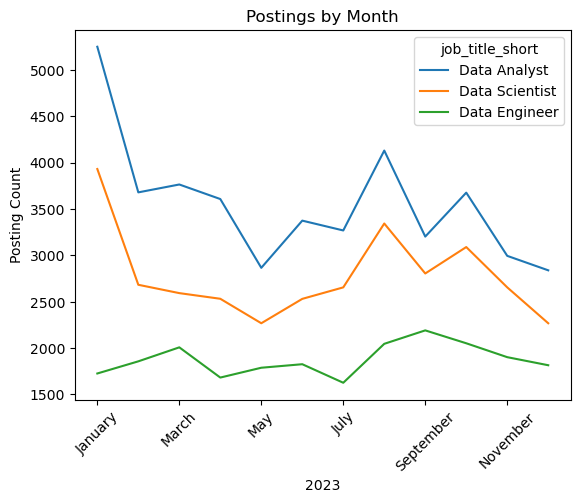

In [55]:
df_us_pivot[top_3].plot(kind='line')
plt.title('Postings by Month')
plt.xlabel('2023')
plt.ylabel('Posting Count')
plt.xticks(rotation=45, ha='center')
plt.show()

In [56]:
top_5 = df_us['job_title_short'].value_counts().head(5)

In [57]:
top_5 = top_5.index.to_list()

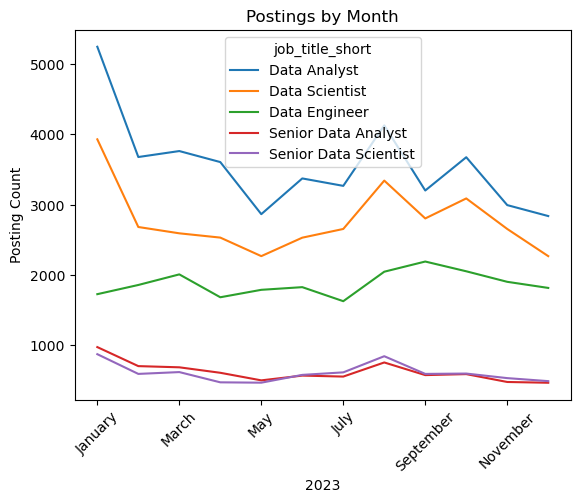

In [59]:
df_us_pivot[top_5].plot(kind='line')
plt.title('Postings by Month')
plt.xlabel('2023')
plt.ylabel('Posting Count')
plt.xticks(rotation=45, ha='center')
plt.show()